In [3]:
# import TensorFlow library
import tensorflow as tf

In [5]:
# Check the version of TensorFlow
tf.__version__

'2.4.1'

# Loading the MNIST dataset in Keras

In [6]:
from tensorflow.keras.datasets import mnist

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 24s 2us/step


Now we have four categories in our dataset

    1. train_images
    2. train_labels
    3. test_images
    4. test_labels

In [11]:
# First of all we need to check our dataset
train_images.shape

(60000, 28, 28)

it is clear now that we have 60000 samples of `28 x 28` rows and columns

In [15]:
# To check the vectorized form of the first image
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [16]:
# Check the shape of the first image(array)
train_images[0].shape

(28, 28)

In [17]:
# To check the dimensional form of the first image(array)
train_images[0].ndim

2

In [18]:
# now to check the shape of the test_image
test_images.shape

(10000, 28, 28)

In [20]:
test_images[0].ndim

2

In [21]:
# To check the value(label) of the train_labels placed at index [0],
# Note: that we have labels from 0:9
train_labels[0]

5

In [24]:
test_labels[0]

7

# Network Architecture (in TensorFlow)

In [26]:
# importing keras models and layers
from tensorflow.keras import models
from tensorflow.keras import layers

In [27]:
# To make a model variable
# Two models in DL are (Sequential and Functional API)
network = models.Sequential()
# Dense (Every node is fully connected to previous and next layer's nodes)
# input_shape (28*28,[blank mean 01 column]) means that input to the first layers will be of fixed sized row = 28*28 = 784 and 
# activation function converts linearity into non-linearity
# 512 argument is basically used to identify the size of the output layer
network.add(layers.Dense(512, activation= 'relu', input_shape = (28 * 28,)))
# Second layer
network.add(layers.Dense(10, activation = 'softmax'))

# Compilation Step

In [28]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Preparing the image Data

In [29]:
train_images = train_images.reshape((60000, 28*28)) # converting 3 dim array into 2-dim
# Following step is taken bring the data [0 ~ 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

Here we have normalized our data to check now, follow the step below to figure out what have been changed in our image data

In [30]:
train_images[0].shape

(784,)

Now Observe the difference of the shape of the train_images before and after transformation

# Preparing the Labels

In [31]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

* `to_categorical` method is used for one-hot-encoding
* to convert train_labels and test_labels into categorical
* what is one-hot-encoding

          A    B    C
      --------------------
      A   1    0    0  = A
      B   0    1    0  = B
      C   0    0    1  = C

# Train the Model

In [32]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.4260 - accuracy: 0.8755
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1153 - accuracy: 0.9667
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0674 - accuracy: 0.9804
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0488 - accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0368 - accuracy: 0.9890


# Evaluate your Model

In [33]:
test_loss, test_acc = network.evaluate(test_images,test_labels)
print('test_acc: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0661 - accuracy: 0.9807
test_acc:  0.9807000160217285


Predict by your model

In [34]:
network.predict(test_images)

array([[1.4665282e-08, 5.7687126e-11, 7.5780736e-07, ..., 9.9997878e-01,
        2.5963256e-08, 1.1552053e-06],
       [6.5057781e-10, 6.8763555e-08, 9.9999988e-01, ..., 2.8208522e-18,
        6.7471562e-10, 8.9460998e-18],
       [2.6393598e-06, 9.9689329e-01, 1.7974889e-04, ..., 1.3572559e-03,
        1.2913318e-03, 3.3055896e-06],
       ...,
       [1.5092433e-13, 6.2396657e-11, 8.9332517e-12, ..., 5.5182363e-07,
        1.4956254e-06, 7.7345303e-06],
       [8.6340810e-09, 2.3888233e-10, 2.9907171e-10, ..., 2.7464842e-10,
        3.1970171e-03, 3.2954962e-11],
       [4.1759124e-11, 2.9261163e-17, 5.5327097e-12, ..., 1.3089703e-16,
        2.0324469e-14, 4.4619354e-15]], dtype=float32)

In [35]:
network.predict(test_images)[0]

array([1.4665282e-08, 5.7687126e-11, 7.5780736e-07, 1.9216404e-05,
       1.6246615e-12, 1.1471263e-08, 3.1987498e-14, 9.9997878e-01,
       2.5963256e-08, 1.1552053e-06], dtype=float32)

Now again load your dataset and visualize it, again

In [36]:
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

print(train_images.ndim)

print(train_images.shape)

print(train_images.dtype)

3
(60000, 28, 28)
uint8


# Displaying the fourth digit

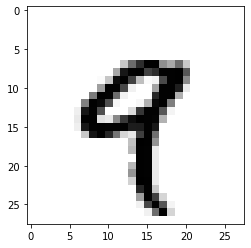

In [37]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

Thank You!